/home/ynx/.local/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


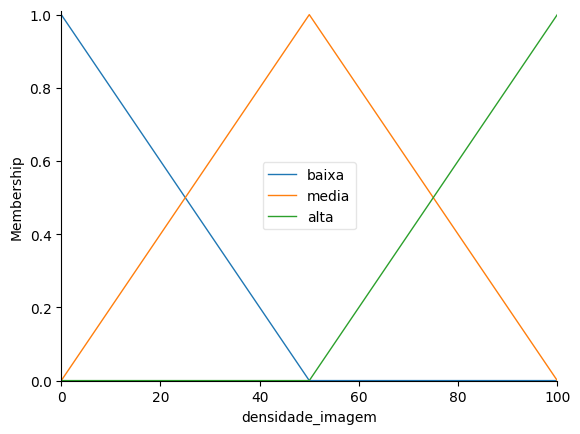

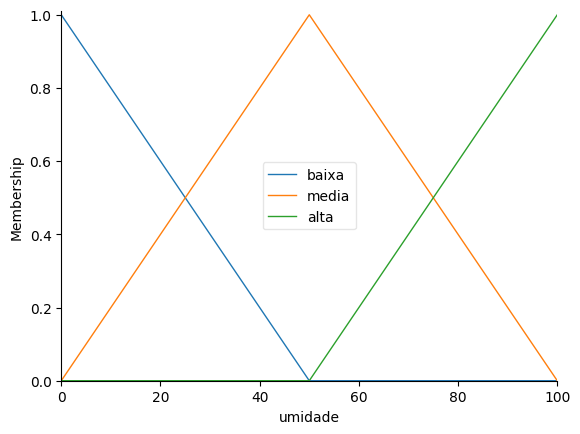

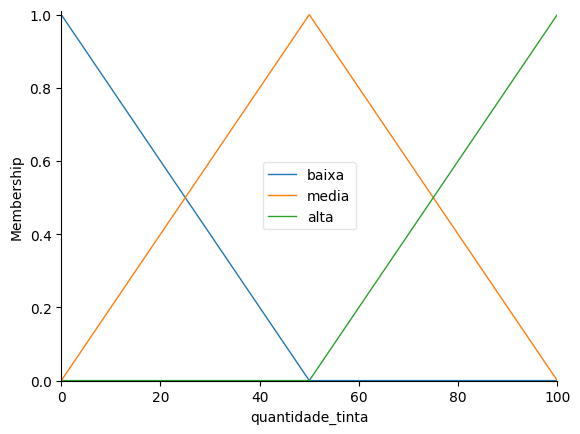

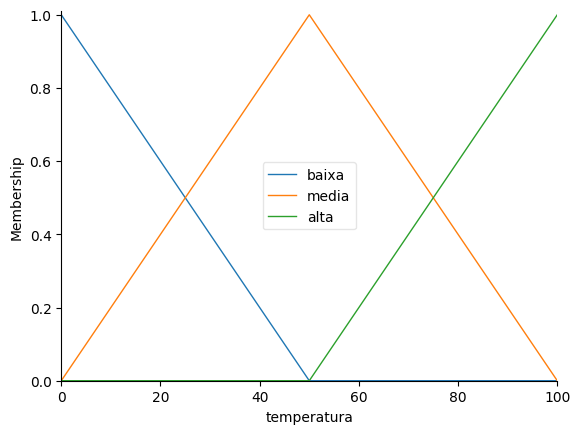

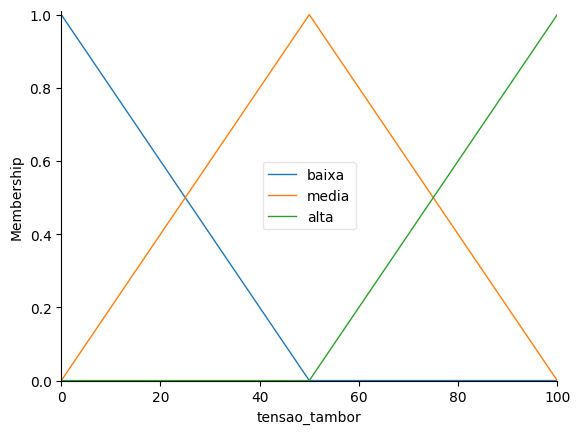

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Passo 1: Definir as variáveis
densidade_imagem = ctrl.Antecedent(np.arange(0, 101, 1), 'densidade_imagem')
umidade = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade')
quantidade_tinta = ctrl.Antecedent(np.arange(0, 101, 1), 'quantidade_tinta')
temperatura = ctrl.Antecedent(np.arange(0, 101, 1), 'temperatura')
tensao_tambor = ctrl.Consequent(np.arange(0, 101, 1), 'tensao_tambor')

# Passo 2: Definir as funções de associação
densidade_imagem['baixa'] = fuzz.trimf(densidade_imagem.universe, [0, 0, 50])
densidade_imagem['media'] = fuzz.trimf(densidade_imagem.universe, [0, 50, 100])
densidade_imagem['alta'] = fuzz.trimf(densidade_imagem.universe, [50, 100, 100])

# Repita para as outras variáveis
umidade['baixa'] = fuzz.trimf(umidade.universe, [0, 0, 50])
umidade['media'] = fuzz.trimf(umidade.universe, [0, 50, 100])
umidade['alta'] = fuzz.trimf(umidade.universe, [50, 100, 100])

quantidade_tinta['baixa'] = fuzz.trimf(quantidade_tinta.universe, [0, 0, 50])
quantidade_tinta['media'] = fuzz.trimf(quantidade_tinta.universe, [0, 50, 100])
quantidade_tinta['alta'] = fuzz.trimf(quantidade_tinta.universe, [50, 100, 100])

temperatura['baixa'] = fuzz.trimf(temperatura.universe, [0, 0, 50])
temperatura['media'] = fuzz.trimf(temperatura.universe, [0, 50, 100])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [50, 100, 100])

tensao_tambor['baixa'] = fuzz.trimf(tensao_tambor.universe, [0, 0, 50])
tensao_tambor['media'] = fuzz.trimf(tensao_tambor.universe, [0, 50, 100])
tensao_tambor['alta'] = fuzz.trimf(tensao_tambor.universe, [50, 100, 100])

# Visualizando as funções de pertinência para cada variável
densidade_imagem.view()
umidade.view()
quantidade_tinta.view()
temperatura.view()
tensao_tambor.view()

Tensão do Tambor: 79.58333333333327


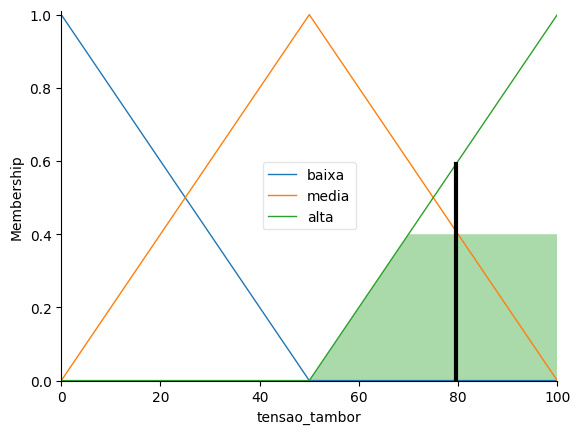

In [6]:
# Passo 3: Criar as regras fuzzy
regra1 = ctrl.Rule(densidade_imagem['alta'] & umidade['baixa'] & quantidade_tinta['alta'] & temperatura['media'], tensao_tambor['alta'])
# Adicione mais regras conforme necessário

# Passo 4: Criar o sistema de controle
sistema_controle = ctrl.ControlSystem([regra1])
sistema = ctrl.ControlSystemSimulation(sistema_controle)

# Passo 5: Aplicar valores de entrada e obter a saída
sistema.input['densidade_imagem'] = 70
sistema.input['umidade'] = 30
sistema.input['quantidade_tinta'] = 80
sistema.input['temperatura'] = 50

sistema.compute()

# Obter resultado
print("Tensão do Tambor:", sistema.output['tensao_tambor'])
tensao_tambor.view(sim=sistema)
